<a href="https://colab.research.google.com/github/zachmakki15/IDS/blob/main/Project5_Problem1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Zach Makki

Intro Data Science

Project #5

Problem #1

04/03/2022

Allow for a mix of Python and R

In [ ]:
%load_ext rpy2.ipython

#Problem 1 (R Linear Regression)

##Import the Dataset

In [ ]:
#Import the dataset in R
%%R

library(readr)
rDataFrame <- read_csv("https://raw.githubusercontent.com/bforoura/AML/master/Company_data.csv", show_col_types = FALSE)
head(rDataFrame)

# A tibble: 6 × 4
     TV Radio Newspaper Sales
  <dbl> <dbl>     <dbl> <dbl>
1 230.   37.8      69.2  22.1
2  44.5  39.3      45.1  10.4
3  17.2  45.9      69.3  12  
4 152.   41.3      58.5  16.5
5 181.   10.8      58.4  17.9
6   8.7  48.9      75     7.2


In [ ]:
%%R

#Get summary of dataset
summary(rDataFrame)

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  


##Get Correlation Matrix

In [ ]:
%%R

#Get correlation matrix
result <- round(cor(rDataFrame),3)
result

             TV Radio Newspaper Sales
TV        1.000 0.055     0.057 0.901
Radio     0.055 1.000     0.354 0.350
Newspaper 0.057 0.354     1.000 0.158
Sales     0.901 0.350     0.158 1.000


The correlation matrix displayed above shows that the TV attribute has the highest correlation to Sales (.901), not only is it the highest but it is also a strong correlation.

##Plot Boxplot

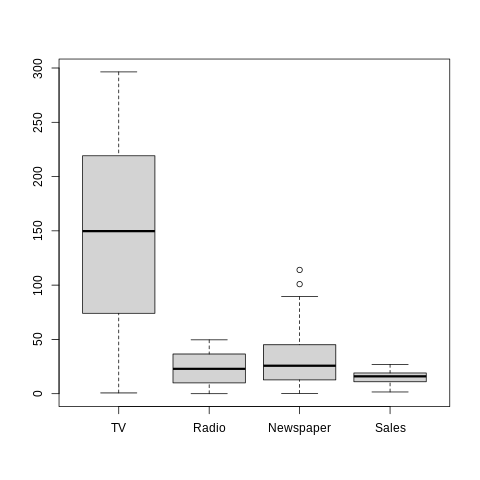

In [ ]:
%%R

#Use base r boxplot to and as matrix to display full dataframe as one boxplot
boxplot(as.matrix(rDataFrame))

##Feature Distributions

Use ggplot to impose the distribution over the histrogram, the (count*number of bins) is used to get the correct range on the y axis. This is needed because ggplot normally displays distribution values on the y-axis instead of counts when imposing a distribution over a histrogram.

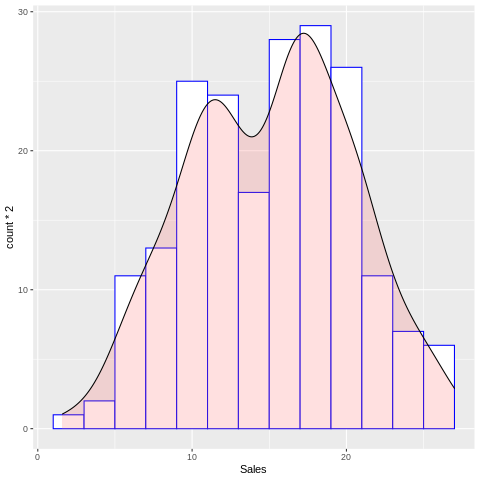

In [ ]:
%%R

#Import ggplot
library(ggplot2)
#Geom histogram layer is the base, geom density layer is imposed on top if it
#Sales
ggplot(rDataFrame, aes(x=Sales)) + 
  geom_histogram(colour="blue", fill="white", binwidth = 2 ) +
  geom_density(aes(y=..count..*2), alpha=.2, fill="#FF6666") 

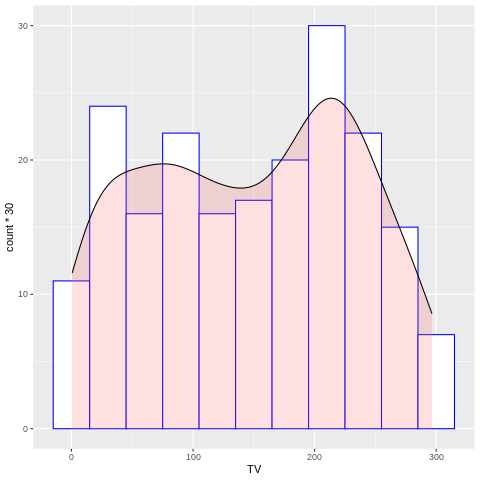

In [ ]:
%%R

#TV
ggplot(rDataFrame, aes(x=TV)) + 
  geom_histogram(colour="blue", fill="white", binwidth = 30 ) +
  geom_density(aes(y=..count..*30), alpha=.2, fill="#FF6666") 

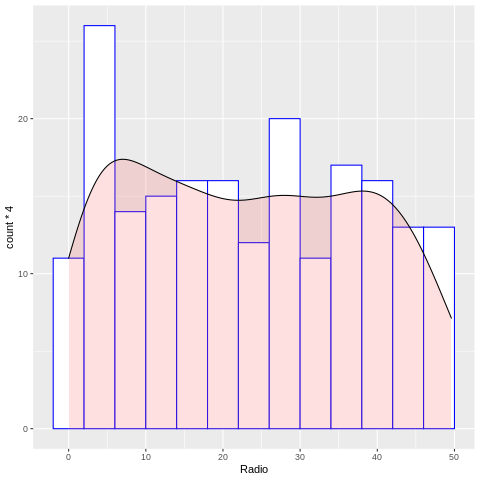

In [ ]:
%%R

#Radio
ggplot(rDataFrame, aes(x=Radio)) + 
  geom_histogram(colour="blue", fill="white", binwidth = 4 ) +
  geom_density(aes(y=..count..*4), alpha=.2, fill="#FF6666") 

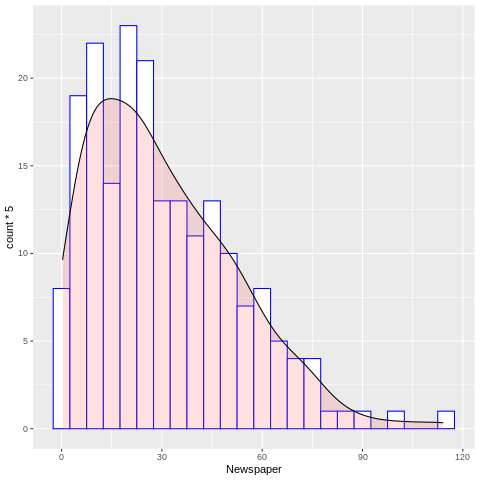

In [ ]:
%%R

#Newspaper
ggplot(rDataFrame, aes(x=Newspaper)) + 
  geom_histogram(colour="blue", fill="white", binwidth = 5 ) +
  geom_density(aes(y=..count..*5), alpha=.2, fill="#FF6666") 

##Check for Missing Values

In [ ]:
%%R

#Use cat print command to combine multiple strings in one print statement
cat("Sales: ", sum(is.na(rDataFrame$Sales)), "\n")
cat("TV: ", sum(is.na(rDataFrame$TV)), "\n")
cat("Radio: ", sum(is.na(rDataFrame$Radio)), "\n")
cat("Newspaper: ", sum(is.na(rDataFrame$TV)), "\n")

Sales:  0 
TV:  0 
Radio:  0 
Newspaper:  0 


##Scatter Plot and Linear Regressions 

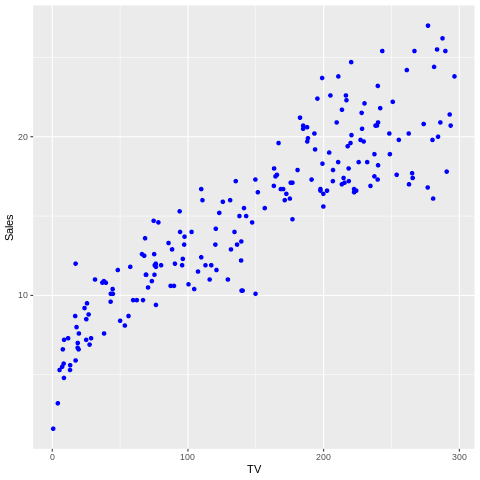

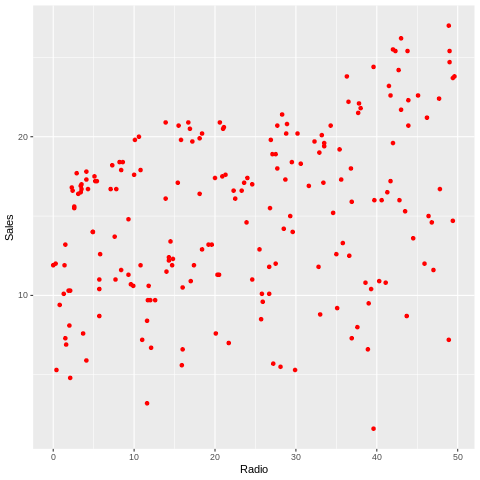

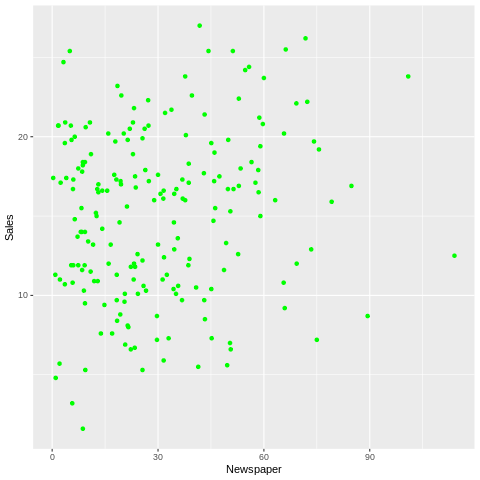

In [ ]:
%%R

#Use ggplot to plot scatter plots for TV and Sales, Radio and Sales, and Newspaper and Sales. Use the prints to get all scatter plots
#printed in one code block
print(ggplot(rDataFrame, aes(x=TV, y=Sales)) + geom_point(colour="blue"))
print(ggplot(rDataFrame, aes(x=Radio, y=Sales)) + geom_point(colour="red"))
print(ggplot(rDataFrame, aes(x=Newspaper, y=Sales)) + geom_point(colour="green"))

The scatter plots above mirror the results of the correlation test. Just from a quick glance it is clear that TV has the strongest relation with sales of the three attributes.

**Use the entire dataset for training and create linear regression for TV and Sales**

In [ ]:
%%R

#Use the r base lm function to get the linear regression for TV and Sales.
linearModel1 <- lm(Sales ~ TV, data=rDataFrame)
print("TV and Sales Summary")
print(summary(linearModel1))
print("TV and Sales Coefficients")
print(coefficients(linearModel1))

#Get MSE
model1Summary <- summary(linearModel1)
mseModel1 <- mean(model1Summary$residuals^2)
print("TV and Sales Accuracy Measures")
cat("R2 Score: ", model1Summary$r.squared, "\n")
cat("MSE: ", mseModel1, "\n")

[1] "TV and Sales Summary"

Call:
lm(formula = Sales ~ TV, data = rDataFrame)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4438 -1.4857  0.0218  1.5042  5.6932 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.974821   0.322553   21.62   <2e-16 ***
TV          0.055465   0.001896   29.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.296 on 198 degrees of freedom
Multiple R-squared:  0.8122,	Adjusted R-squared:  0.8112 
F-statistic: 856.2 on 1 and 198 DF,  p-value: < 2.2e-16

[1] "TV and Sales Coefficients"
(Intercept)          TV 
 6.97482149  0.05546477 
[1] "TV and Sales Accuracy Measures"
R2 Score:  0.8121757 
MSE:  5.217744 


**Linear Model: Sales = 6.975 + 0.055 * TV**

**Split dataset into training and testing datasets using 70/30 split**

In [ ]:
%%R

#Use sample int function to get split index then use that index to split the dataset, seed is set to 42 to create re-testability
set.seed(42)
splitIndex <- sample.int(n = nrow(rDataFrame), size = floor(.70*nrow(rDataFrame)), replace = F)
train <- rDataFrame[splitIndex,]
test <- rDataFrame[-splitIndex,]

**Re run the last regression but this time with train/test datasets**

In [ ]:
%%R

#Get TV and Sales linear regression again, but this time on 70/30 split
linearModel2 <- lm(Sales ~ TV, data=train)
print("TV and Sales Coefficients")
print(coefficients(linearModel2))

[1] "TV and Sales Coefficients"
(Intercept)          TV 
 7.00566939  0.05463454 


**Linear Model: Sales = 7.005 + 0.055 * TV**

**Use predict this time to get r2 and MSE**

In [ ]:
%%R

#Use predict function to get y_pred values
yPredict_model2 <- predict(linearModel2, test)

#Function to get r2
rsq <- function (x, y) cor(x, y) ^ 2

tvR2 <- rsq(test$Sales, yPredict_model2)
tvMSE <- mean((test$Sales - yPredict_model2)^2)
cat("R2: ", tvR2, "\n")
cat("MSE Value: ", tvMSE, "\n")

R2:  0.812349 
MSE Value:  5.704982 


**Plot regression lines for the last two models**

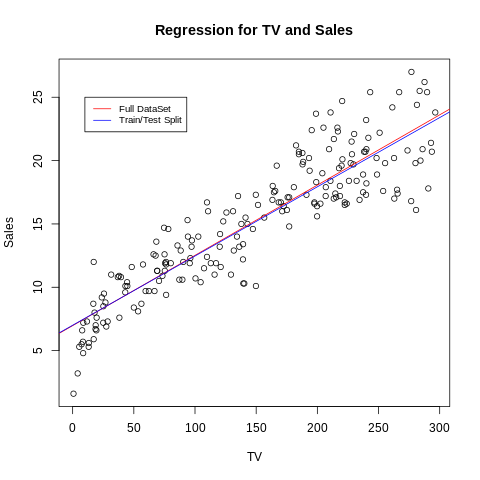

In [ ]:
%%R

#Use ablines to add regresssion lines to plot
plot(rDataFrame$TV,rDataFrame$Sales,
     main='Regression for TV and Sales',
     xlab='TV',ylab='Sales')
abline(linearModel1, col="red")
abline(linearModel2, col="blue")
legend(10, 25, legend=c("Full DataSet", "Train/Test Split"), col=c("red", "blue"), lty=1:1, cex=0.8)

The regression lines for the two models (one trained with the full dataset, the other trained on a 70/30 train/test split) are almost identical. 

##Additional Regressions for Radio, Newspaper

Additional linear regressions will be ran for radio and newspaper to see if any more can be discovered about their relationship with sales. The results of the linear models will be compared to the results of the TV linear regressions.

**Radio**

In [ ]:
%%R

linearModel3 <- lm(Sales ~ Radio, data=train)
print("Radio and Sales Coefficients")
print(coefficients(linearModel3))

[1] "Radio and Sales Coefficients"
(Intercept)       Radio 
 13.0503735   0.1016412 


**Linear Model: Sales = 13.050 + 0.102 * Radio**

In [ ]:
%%R

yPredict_model3 <- predict(linearModel3, test)
radioR2 <- rsq(test$Sales, yPredict_model3)
radioMSE <- mean((test$Sales - yPredict_model3)^2)
cat("R2: ", radioR2, "\n")
cat("MSE Value: ", radioMSE, "\n")

R2:  0.2272247 
MSE Value:  24.73362 


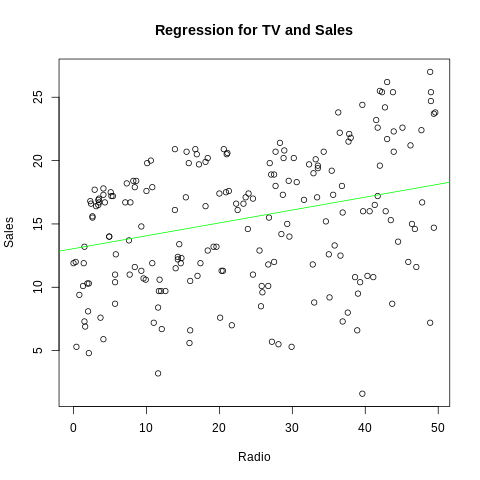

In [ ]:
%%R

plot(rDataFrame$Radio,rDataFrame$Sales,
     main='Regression for TV and Sales',
     xlab='Radio',ylab='Sales')
abline(linearModel3, col="green")

**Newspaper**

In [ ]:
%%R

linearModel4 <- lm(Sales ~ Newspaper, data=train)
print("Newspaper and Sales Coefficients")
print(coefficients(linearModel4))

[1] "Newspaper and Sales Coefficients"
(Intercept)   Newspaper 
14.39530395  0.03459382 


**Linear Model: Sales = 14.395 + 0.034 * Newspaper**

In [ ]:
%%R

yPredict_model4 <- predict(linearModel4, test)
newspaperR2 <- rsq(test$Sales, yPredict_model4)
newspaperMSE <- mean((test$Sales - yPredict_model4)^2)
cat("R2: ", newspaperR2, "\n")
cat("MSE Value: ", newspaperMSE, "\n")

R2:  0.03442038 
MSE Value:  29.62971 


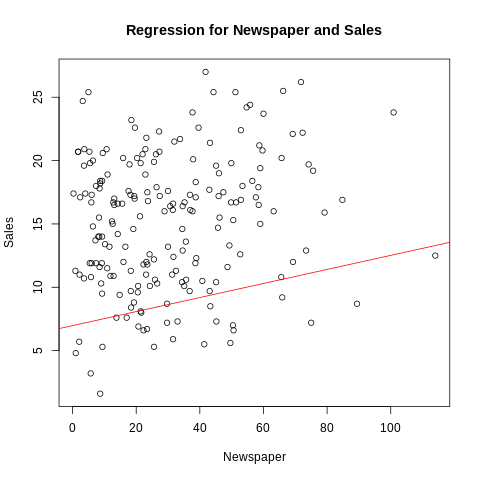

In [ ]:
%%R

plot(rDataFrame$Newspaper,rDataFrame$Sales,
     main='Regression for Newspaper and Sales',
     xlab='Newspaper',ylab='Sales')
abline(linearModel1, col="red")

**Bar graph comparing results of the three attributes tested using the train/test datasets**

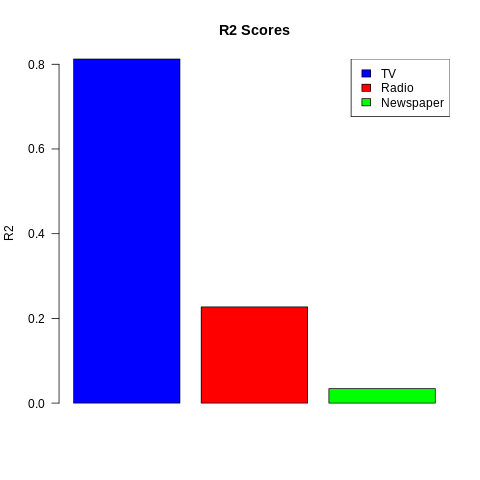

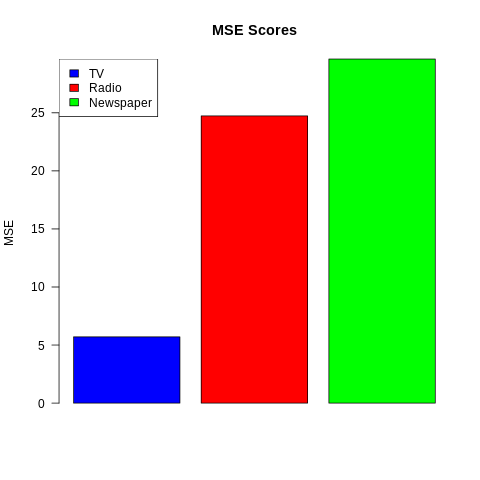

In [ ]:
%%R

r2DataFrame <- c(tvR2, radioR2, newspaperR2)
mseDataFrame <- c(tvMSE, radioMSE, newspaperMSE)
colors <- c("blue", "red", "green")

barplot(r2DataFrame, col = colors, ylab="R2", las = 2, beside = TRUE, main="R2 Scores")
legend("topright", legend = c("TV", "Radio", "Newspaper"), fill = colors)

barplot(mseDataFrame, col = colors, ylab="MSE", las = 2, beside = TRUE, main="MSE Scores")
legend("topleft", legend = c("TV", "Radio", "Newspaper"), fill = colors)

##Summary

The report above shows that of the three attributes (TV, Radio, Newspaper) in the dataset, TV has the strongest positive relationship with sales. This was shown in the correlation matrix, the scatter plots, and the results of the linear regressions. If a company were to be evaluating this data attempting to decide their yearly marketing budget, they would be wise to dedicate the majority of that budget to TV advertising.  